In [1]:
import pandas as pd
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)
import os
import sys
import utils

100%|██████████| 3/3 [00:01<00:00,  2.99it/s]


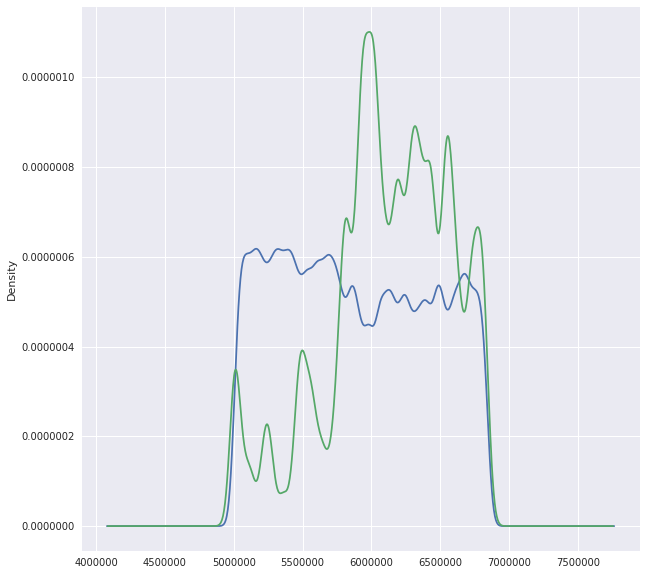

In [2]:
bur = utils.read_df_pkl('../input/clean_bur*')
app = utils.read_df_pkl('../input/clean_app*')
key = 'SK_ID_CURR'
target = 'TARGET'
bur_t = bur.merge(app[[key, target]], on=key, how='inner')

plt.figure(figsize=(10,10))
# sns.lmplot(x='SK_ID_BUREAU',y=feat1,data=bur, fit_reg=False, size=8, scatter_kws={'s':10}, hue=target)
key_b = 'SK_ID_BUREAU'
bur_train = bur_t[bur_t[target]>=0]
bur_test = bur_t[bur_t[target]<0]
bur_train[key_b].plot(kind='kde')
bur_test[key_b].plot(kind='kde')

<Figure size 720x720 with 0 Axes>

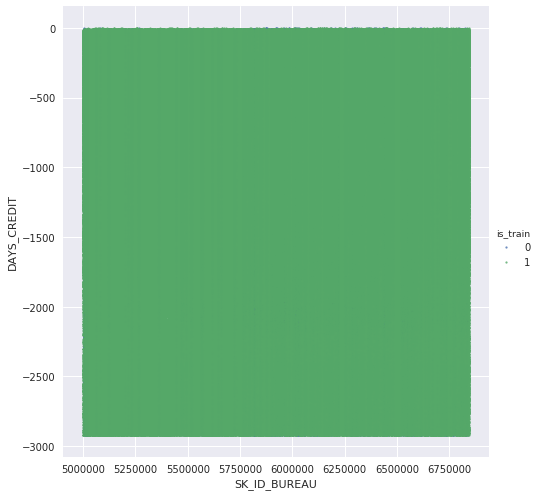

In [3]:
# bureauのDAYS_CREDITはIDの大きさと関連がないか？→なさげ
plt.figure(figsize=(10,10))
df = bur_t.copy()
df_train = df[df[target]>=0]
df_test = df[df[target]<0]
dc = 'SK_ID_BUREAU'
# dc = 'SK_ID_PREV'
df_train = df_train.groupby(dc)['DAYS_CREDIT'].mean().reset_index()
df_test = df_test.groupby(dc)['DAYS_CREDIT'].mean().reset_index()
df_train['is_train'] = 1
df_test['is_train'] = 0
df = pd.concat([df_train, df_test], axis=0)
sns.lmplot(x=dc,y='DAYS_CREDIT',data=df, fit_reg=False, size=7, scatter_kws={'s':5}, hue='is_train')